## Prerequisites

nltk==3.4.5

## Data loading

Load data from this link:
    
    https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data

In [1]:
import pandas as pd 
import numpy as np 
import nltk

In [2]:
df = pd.read_csv("jigsaw-toxic-comment-classification-challenge/train.csv/train.csv")

In [3]:
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\r\n\r\nCongratulations from me as well, use ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [4]:
df.shape

(159571, 8)

In the previous day we worked with already preprocessed data for us.  
This day try to make this preprocessing by ourselves.

#### Text lowercasing: 

##### Create a column 'comment_text_lower' in a dataframe, and make all of the text from the column 'comment_text' copied to the 'comment_text_lower' column, but lowercased.

In [5]:
df['comment_text_lower'] = df['comment_text'].str.lower() ### Your code here done

In [6]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text_lower
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0,explanation\r\nwhy the edits made under my use...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,d'aww! he matches this background colour i'm s...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"hey man, i'm really not trying to edit war. it..."
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0,"""\r\nmore\r\ni can't make any real suggestions..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"you, sir, are my hero. any chance you remember..."


#### Text tokenization 

##### Create a column 'comment_text_tokenized_space' in a dataframe, and make all of the text from the column 'comment_text' copied to the 'comment_text_tokenized_space' column, but lowercased tokenized by space.

In [7]:
df['comment_text_tokenized_space'] = df['comment_text'].str.lower().str.split() ### Your code here done

In [8]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text_lower,comment_text_tokenized_space
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0,explanation\r\nwhy the edits made under my use...,"[explanation, why, the, edits, made, under, my..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,d'aww! he matches this background colour i'm s...,"[d'aww!, he, matches, this, background, colour..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"hey man, i'm really not trying to edit war. it...","[hey, man,, i'm, really, not, trying, to, edit..."
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0,"""\r\nmore\r\ni can't make any real suggestions...","["", more, i, can't, make, any, real, suggestio..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"you, sir, are my hero. any chance you remember...","[you,, sir,, are, my, hero., any, chance, you,..."


##### There a lot of words tokenized by space, but they contains additional punctuation characters. Let's try to delete them. 

In [9]:
# Load punctuation 
from string import punctuation

def clean_token(token): 
    '''
    Args: token: str 
    Returns: token: str 
    
    This function deletes all of the punctuation characters 
    in the token and returns the cleaned one 
    '''
    chars_cleaned = token.translate({ord(c): None for c in punctuation}) ### Your code here done
    return "".join(chars_cleaned)

# Use method apply - read about it more if needed (pandas, df.apply, lambda functions, list of comprehension)
df['comment_text_tokenized_space_cleaned'] = df.comment_text_tokenized_space.apply(
    lambda x: [clean_token(i) for i in x] ### You code here (list of comprehension) done
    )

In [10]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text_lower,comment_text_tokenized_space,comment_text_tokenized_space_cleaned
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0,explanation\r\nwhy the edits made under my use...,"[explanation, why, the, edits, made, under, my...","[explanation, why, the, edits, made, under, my..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,d'aww! he matches this background colour i'm s...,"[d'aww!, he, matches, this, background, colour...","[daww, he, matches, this, background, colour, ..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"hey man, i'm really not trying to edit war. it...","[hey, man,, i'm, really, not, trying, to, edit...","[hey, man, im, really, not, trying, to, edit, ..."
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0,"""\r\nmore\r\ni can't make any real suggestions...","["", more, i, can't, make, any, real, suggestio...","[, more, i, cant, make, any, real, suggestions..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"you, sir, are my hero. any chance you remember...","[you,, sir,, are, my, hero., any, chance, you,...","[you, sir, are, my, hero, any, chance, you, re..."


Quite a lot of work, yes?   
Let's try to use already implemented methods for performing a tokenization:

## NLTK

In [11]:
#  sent_tokenize - if you need to separate sentences one from another 
#  word_tokenize - if you need to tokenize a sentence
from nltk.tokenize import sent_tokenize, word_tokenize

#nltk.download('punkt') # if needed

In [12]:
sentence = "At eight o'clock on Thursday morning, Arthur didn't feel very good."
print (word_tokenize(sentence))

['At', 'eight', "o'clock", 'on', 'Thursday', 'morning', ',', 'Arthur', 'did', "n't", 'feel', 'very', 'good', '.']


In [13]:
df['nltk_tokenized'] = df.comment_text.apply(lambda x: word_tokenize(x))### Your code here) done

In [14]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text_lower,comment_text_tokenized_space,comment_text_tokenized_space_cleaned,nltk_tokenized
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0,explanation\r\nwhy the edits made under my use...,"[explanation, why, the, edits, made, under, my...","[explanation, why, the, edits, made, under, my...","[Explanation, Why, the, edits, made, under, my..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,d'aww! he matches this background colour i'm s...,"[d'aww!, he, matches, this, background, colour...","[daww, he, matches, this, background, colour, ...","[D'aww, !, He, matches, this, background, colo..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"hey man, i'm really not trying to edit war. it...","[hey, man,, i'm, really, not, trying, to, edit...","[hey, man, im, really, not, trying, to, edit, ...","[Hey, man, ,, I, 'm, really, not, trying, to, ..."
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0,"""\r\nmore\r\ni can't make any real suggestions...","["", more, i, can't, make, any, real, suggestio...","[, more, i, cant, make, any, real, suggestions...","[``, More, I, ca, n't, make, any, real, sugges..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"you, sir, are my hero. any chance you remember...","[you,, sir,, are, my, hero., any, chance, you,...","[you, sir, are, my, hero, any, chance, you, re...","[You, ,, sir, ,, are, my, hero, ., Any, chance..."


Please, see that word_tokenize not only separated the punctuation from the text corretly, but saved the punctuation inside the token (' or -)

##### ! Modify your function defined previously to save a pucntuation inside the token and delete it only if it glued to the token in the end or in the beginning. 

In [15]:
### Your code here 
def clean_token_(token): 
    return token.strip(punctuation)

In [16]:
def flat_nested(nested):
    '''
    Args: nested list: list ([[a], [b]])
    Returns: flatten list: list ([a, b])
    '''
    ### Your code here 
    flatten = [item for sublist in nested for item in sublist]
    return flatten

In [17]:
from nltk.probability import FreqDist

# Frequency dict will accept only list of tokens, not list of lists of tokens, etc 
# Flat your list previously if needed 
fdist = FreqDist(flat_nested(df.comment_text_tokenized_space_cleaned.tolist()))

In [18]:
fdist.most_common(20)

[('the', 495141),
 ('to', 296821),
 ('of', 224004),
 ('and', 222325),
 ('a', 214120),
 ('you', 204456),
 ('i', 200423),
 ('is', 175926),
 ('', 161939),
 ('that', 154258),
 ('in', 144128),
 ('it', 129540),
 ('for', 102430),
 ('this', 97011),
 ('not', 93318),
 ('on', 89425),
 ('be', 83313),
 ('as', 77216),
 ('have', 72167),
 ('are', 71852)]

##### Analyse the results. What are these words? Have you seen it previously in the 1 task?  
Does these words contains a lot of meaningful information? 

In [19]:
### Your COMMENTS here 
### I think yes, these words are used for more understanding what someone want to say,
### for example sentance may be like this: "I home seating sofa waiting coffee" or maybe better "I'm in home seating
### on sofa and waiting for the coffee"

##### Distribution

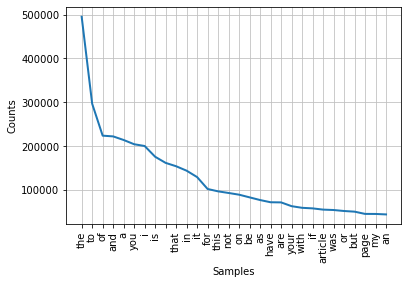

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline 

fdist.plot(30, cumulative=False)
plt.show()

##### Stop words 

In [21]:
from nltk.corpus import stopwords

stop_words=set(stopwords.words("english"))
print(stop_words)

{"wouldn't", 'an', 'both', 'between', "doesn't", "you'd", 'we', 'as', 'himself', 'did', "won't", 'up', 'then', 'it', 'than', 'there', 'he', 'down', 'haven', 'needn', 'having', 'd', 'myself', 'aren', 'couldn', 'who', 'now', 'ours', "that'll", 'over', 'those', 'once', 'ain', 'and', 'this', 'mustn', 'which', 'be', 'his', 'the', 'll', 'most', 'with', 'had', 'about', 's', 'out', 'she', 'during', 'any', 'herself', 'other', 'doing', 'in', "mustn't", 'ourselves', "couldn't", 'before', 'how', 'that', 'through', "it's", 'wouldn', 'wasn', 'you', 'am', 've', 'by', 'weren', "shan't", 'not', "didn't", 'because', 'above', 'me', 'until', 'of', 'themselves', 'her', 'was', 'what', 'y', 'yourselves', 'isn', 'hadn', 'hasn', 'them', 'were', "you're", 'further', 'is', 'where', "isn't", 're', 'at', 'no', 'been', 'from', 'does', 'o', 'same', 'hers', "hadn't", 'its', 'just', 'being', 'on', 'their', "haven't", "she's", 'didn', 'when', 'why', 'shouldn', 'few', 'more', 'doesn', "hasn't", 'itself', 'have', "aren't

##### Delete all of the stop words from the list of tokens created by nltk word_tokenize function.

In [22]:
### Your code here
def check_icwords(token):
    for i in punctuation:
        if token.startswith(i) or token.endswith(i):
            return True
    return False

df['cleaned_nltk'] = df.nltk_tokenized.apply(lambda x: [w for w in x if not w.lower() in stop_words]).apply(lambda x: [w for w in x if not check_icwords(w)])
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text_lower,comment_text_tokenized_space,comment_text_tokenized_space_cleaned,nltk_tokenized,cleaned_nltk
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0,explanation\r\nwhy the edits made under my use...,"[explanation, why, the, edits, made, under, my...","[explanation, why, the, edits, made, under, my...","[Explanation, Why, the, edits, made, under, my...","[Explanation, edits, made, username, Hardcore,..."
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,d'aww! he matches this background colour i'm s...,"[d'aww!, he, matches, this, background, colour...","[daww, he, matches, this, background, colour, ...","[D'aww, !, He, matches, this, background, colo...","[D'aww, matches, background, colour, seemingly..."
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,"hey man, i'm really not trying to edit war. it...","[hey, man,, i'm, really, not, trying, to, edit...","[hey, man, im, really, not, trying, to, edit, ...","[Hey, man, ,, I, 'm, really, not, trying, to, ...","[Hey, man, really, trying, edit, war, guy, con..."
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0,"""\r\nmore\r\ni can't make any real suggestions...","["", more, i, can't, make, any, real, suggestio...","[, more, i, cant, make, any, real, suggestions...","[``, More, I, ca, n't, make, any, real, sugges...","[ca, n't, make, real, suggestions, improvement..."
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,"you, sir, are my hero. any chance you remember...","[you,, sir,, are, my, hero., any, chance, you,...","[you, sir, are, my, hero, any, chance, you, re...","[You, ,, sir, ,, are, my, hero, ., Any, chance...","[sir, hero, chance, remember, page]"


There are probably a lot of words such as 'apple'/'apples', etc whose presence extends our vocabulary a lot. 
Please, calculate the size of your vocabulary here. 

In [23]:
### Define the size of your vocab - number of uniq words from all of the texts 
from collections import Counter
import re
text = " ".join(comment for comment in flat_nested(df.cleaned_nltk)).lower()
cnt = Counter(re.split(r'\s+', text))

vocab_size_init = len(cnt) ### Your code here 
vocab_size_init

231763

In [24]:
# Stemming will help us to reduce the numbed of uniq words in our vocabulary by deleting different forms of the same word
from nltk.stem import PorterStemmer 
from nltk.stem.wordnet import WordNetLemmatizer

stem = PorterStemmer()
lem = WordNetLemmatizer()

word = "flying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: fly
Stemmed Word: fli


### Please, apply stemming  and lemmatization to the tokenized words.   

##### 1. Apply stemming first - calculate the number of the uniq words after it 

In [25]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
vocab_size_stemmed = len(Counter(flat_nested(df.cleaned_nltk.apply(lambda x: [stemmer.stem(w) for w in x]))))
print("Size of vocabulary after stemming", vocab_size_stemmed)

Size of vocabulary after stemming 195049


##### 2. Apply lemmatization and calculate the same

In [26]:
vocab_size_lemmatized = len(Counter(flat_nested(df.cleaned_nltk.apply(lambda x: [lem.lemmatize(w.lower()) for w in x]))))
print("Size of vocabulary after lemmatize", vocab_size_lemmatized)

Size of vocabulary after lemmatize 221910


##### 3. Compare, analyse

In [27]:
### size of vocabulary after stemming is less than after lemmatizing

## Spacy

In [28]:
sample_text = """What is impeachment?
Put simply, it's a process that allows senior figures in government to hold other officials (like judges, the president and cabinet members) to account if they're suspected of committing offences while in office.
Those offences can include "treason, bribery or other high crimes and misdemeanours".
After someone is impeached, they then go on trial in the Senate, the upper house of Congress, the members of which will decide whether they are guilty or not. It's a political trial, not a criminal one.
"""

In [29]:
sample_text = sample_text.replace("\n", " ").replace("\t", " ")

In [30]:
# You need to load the model firstly, once loaded, you can comment the line 

#! python -m spacy download en

In [31]:
import spacy
nlp = spacy.load("en", disable=["tagger", "parser", "ner"])

doc = nlp(sample_text)
spacy_words = [token.text for token in doc]

print(f"Tokenized words: {spacy_words}")

Tokenized words: ['What', 'is', 'impeachment', '?', 'Put', 'simply', ',', 'it', "'s", 'a', 'process', 'that', 'allows', 'senior', 'figures', 'in', 'government', 'to', 'hold', 'other', 'officials', '(', 'like', 'judges', ',', 'the', 'president', 'and', 'cabinet', 'members', ')', 'to', 'account', 'if', 'they', "'re", 'suspected', 'of', 'committing', 'offences', 'while', 'in', 'office', '.', 'Those', 'offences', 'can', 'include', '"', 'treason', ',', 'bribery', 'or', 'other', 'high', 'crimes', 'and', 'misdemeanours', '"', '.', 'After', 'someone', 'is', 'impeached', ',', 'they', 'then', 'go', 'on', 'trial', 'in', 'the', 'Senate', ',', 'the', 'upper', 'house', 'of', 'Congress', ',', 'the', 'members', 'of', 'which', 'will', 'decide', 'whether', 'they', 'are', 'guilty', 'or', 'not', '.', 'It', "'s", 'a', 'political', 'trial', ',', 'not', 'a', 'criminal', 'one', '.']


In [32]:
print("Attributes which spacy token has: \n {}".format([dir(tok) for tok in doc][0]))

Attributes which spacy token has: 
 ['_', '__bytes__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__pyx_vtable__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', 'ancestors', 'check_flag', 'children', 'cluster', 'conjuncts', 'dep', 'dep_', 'doc', 'ent_id', 'ent_id_', 'ent_iob', 'ent_iob_', 'ent_kb_id', 'ent_kb_id_', 'ent_type', 'ent_type_', 'get_extension', 'has_extension', 'has_vector', 'head', 'i', 'idx', 'is_alpha', 'is_ancestor', 'is_ascii', 'is_bracket', 'is_currency', 'is_digit', 'is_left_punct', 'is_lower', 'is_oov', 'is_punct', 'is_quote', 'is_right_punct', 'is_sent_start', 'is_space', 'is_stop', 'is_title', 'is_upper', 'lang', 'lang_', 'left_edge', 'lefts', 'lemma', 'lemma_', 'lex_id', 'like_email', 'like_num', 'like_url', 'lower', 'lower_',

In [33]:
# We can access lemmas: 

lemmas = [token.lemma_ for token in doc]
print(f"Lemmatized words: {lemmas}")

Lemmatized words: ['What', 'be', 'impeachment', '?', 'Put', 'simply', ',', '-PRON-', 'have', 'a', 'process', 'that', 'allow', 'senior', 'figure', 'in', 'government', 'to', 'hold', 'other', 'official', '(', 'like', 'judge', ',', 'the', 'president', 'and', 'cabinet', 'member', ')', 'to', 'account', 'if', '-PRON-', 'be', 'suspect', 'of', 'commit', 'offence', 'while', 'in', 'office', '.', 'Those', 'offence', 'can', 'include', '"', 'treason', ',', 'bribery', 'or', 'other', 'high', 'crime', 'and', 'misdemeanour', '"', '.', 'After', 'someone', 'be', 'impeach', ',', 'they', 'then', 'go', 'on', 'trial', 'in', 'the', 'Senate', ',', 'the', 'upper', 'house', 'of', 'Congress', ',', 'the', 'member', 'of', 'which', 'will', 'decide', 'whether', 'they', 'be', 'guilty', 'or', 'not', '.', '-PRON-', 'have', 'a', 'political', 'trial', ',', 'not', 'a', 'criminal', 'one', '.']


In [34]:
# We can filter stop words: 

cleaned_words = [token.lemma_ for token in doc if not token.is_stop]
print(f"Cleaned words: {cleaned_words}")

Cleaned words: ['impeachment', '?', 'simply', ',', 'process', 'allow', 'senior', 'figure', 'government', 'hold', 'official', '(', 'like', 'judge', ',', 'president', 'cabinet', 'member', ')', 'account', 'suspect', 'commit', 'offence', 'office', '.', 'offence', 'include', '"', 'treason', ',', 'bribery', 'high', 'crime', 'misdemeanour', '"', '.', 'impeach', ',', 'trial', 'Senate', ',', 'upper', 'house', 'Congress', ',', 'member', 'decide', 'guilty', '.', 'political', 'trial', ',', 'criminal', '.']


In [35]:
# We can filter punctuation tokens: 

cleaned_words = [token.lemma_ for token in doc if not token.is_punct]
print(f"Cleaned words: {cleaned_words}")

Cleaned words: ['What', 'be', 'impeachment', 'Put', 'simply', '-PRON-', 'have', 'a', 'process', 'that', 'allow', 'senior', 'figure', 'in', 'government', 'to', 'hold', 'other', 'official', 'like', 'judge', 'the', 'president', 'and', 'cabinet', 'member', 'to', 'account', 'if', '-PRON-', 'be', 'suspect', 'of', 'commit', 'offence', 'while', 'in', 'office', 'Those', 'offence', 'can', 'include', 'treason', 'bribery', 'or', 'other', 'high', 'crime', 'and', 'misdemeanour', 'After', 'someone', 'be', 'impeach', 'they', 'then', 'go', 'on', 'trial', 'in', 'the', 'Senate', 'the', 'upper', 'house', 'of', 'Congress', 'the', 'member', 'of', 'which', 'will', 'decide', 'whether', 'they', 'be', 'guilty', 'or', 'not', '-PRON-', 'have', 'a', 'political', 'trial', 'not', 'a', 'criminal', 'one']


In [36]:
df_sample = df.sample(100, random_state=13) # fix random_state to make your experiments reproducible 

##### Create columns [spacy_lemmas], [spacy_tokens], [spacy_filtered_stop_words], [spacy_filtered_punct], [spacy_filtered_stop_punct]  
In spacy_filtered_stop_punct filter stop words AND punctuation 

TIP: Use lambda functions 

In [37]:
df_sample['spacy_tokens'] = df_sample.comment_text.apply(lambda x: [token.text for token in nlp(x.replace("\n", " ").replace("\t", " "))])### Your code here for 4 additional columns
df_sample['spacy_lemmas'] = df_sample.comment_text.apply(lambda x: [token.lemma_ for token in nlp(x.replace("\n", " ").replace("\t", " "))]) 
df_sample['spacy_filtered_stop_words'] = df_sample.comment_text.apply(lambda x: [token.lemma_ for token in nlp(x.replace("\n", " ").replace("\t", " ")) if not token.is_stop ])
df_sample['spacy_filtered_punct'] = df_sample.comment_text.apply(lambda x: [token.lemma_ for token in nlp(x.replace("\n", " ").replace("\t", " "))if not token.is_punct])
df_sample['spacy_filtered_stop_punct'] = df_sample.comment_text.apply(lambda x: [token.lemma_ for token in nlp(x.replace("\n", " ").replace("\t", " "))if not (token.is_punct or token.is_stop)])


In [38]:
df_sample.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,comment_text_lower,comment_text_tokenized_space,comment_text_tokenized_space_cleaned,nltk_tokenized,cleaned_nltk,spacy_tokens,spacy_lemmas,spacy_filtered_stop_words,spacy_filtered_punct,spacy_filtered_stop_punct
25680,43fb0a70fae5057f,"(incorrect, moronic allegations of)",1,0,0,0,0,0,"(incorrect, moronic allegations of)","[(incorrect,, moronic, allegations, of)]","[incorrect, moronic, allegations, of]","[(, incorrect, ,, moronic, allegations, of, )]","[incorrect, moronic, allegations]","[(, incorrect, ,, moronic, allegations, of, )]","[(, incorrect, ,, moronic, allegation, of, )]","[(, incorrect, ,, moronic, allegation, )]","[incorrect, moronic, allegation, of]","[incorrect, moronic, allegation]"
74202,c688777f515b665a,"As the previous article lead already used, dig...",0,0,0,0,0,0,"as the previous article lead already used, dig...","[as, the, previous, article, lead, already, us...","[as, the, previous, article, lead, already, us...","[As, the, previous, article, lead, already, us...","[previous, article, lead, already, used, digit...","[As, the, previous, article, lead, already, us...","[As, the, previous, article, lead, already, us...","[previous, article, lead, ,, digital, system, ...","[As, the, previous, article, lead, already, us...","[previous, article, lead, digital, system, pro..."
87912,eb233cfbf51fd72f,▲ to ? \r\n\r\n...character encoding issues. O...,0,0,0,0,0,0,▲ to ? \r\n\r\n...character encoding issues. o...,"[▲, to, ?, ...character, encoding, issues., oo...","[▲, to, , character, encoding, issues, oops, f...","[▲, to, ?, ..., character, encoding, issues, ....","[▲, character, encoding, issues, Oops, Fixed, ...","[▲, to, ?, \r \r , ..., character, encoding, i...","[▲, to, ?, \r \r , ..., character, encode, iss...","[▲, ?, \r \r , ..., character, encode, issue, ...","[▲, to, \r \r , character, encode, issue, Oops...","[▲, \r \r , character, encode, issue, Oops, Fi..."
130308,b920ddbf9499a110,Yes. I know that was what Mikka did. And you k...,0,0,0,0,0,0,yes. i know that was what mikka did. and you k...,"[yes., i, know, that, was, what, mikka, did., ...","[yes, i, know, that, was, what, mikka, did, an...","[Yes, ., I, know, that, was, what, Mikka, did,...","[Yes, know, Mikka, know, S/he, right, Surprise...","[Yes, ., I, know, that, was, what, Mikka, did,...","[Yes, ., I, know, that, be, what, Mikka, do, ....","[Yes, ., know, Mikka, ., know, :, S, /, right,...","[Yes, I, know, that, be, what, Mikka, do, And,...","[Yes, know, Mikka, know, S, right, Surprised, ..."
147189,386b62dc67bcb66c,Son of a bitchSon of a bitch,1,0,1,0,1,0,son of a bitchson of a bitch,"[son, of, a, bitchson, of, a, bitch]","[son, of, a, bitchson, of, a, bitch]","[Son, of, a, bitchSon, of, a, bitch]","[Son, bitchSon, bitch]","[Son, of, a, bitchSon, of, a, bitch]","[Son, of, a, bitchSon, of, a, bitch]","[Son, bitchSon, bitch]","[Son, of, a, bitchSon, of, a, bitch]","[Son, bitchSon, bitch]"


####  Save the results (df and df_sample) in csv file using df.to_csv function. Share your csv files using google drive or email. 


here: https://drive.google.com/drive/folders/1qmkQK7oLKBrb0SewQp-PT7n20M05eBP4?usp=sharing

### WordCloud visualizations 

Create wordclouds for words cleaned from stop words and punctuation using NLTK library - as in previous task. 
(with spacy it would work slow, so do not apply it to the whole dataset, use only df_sample part) 

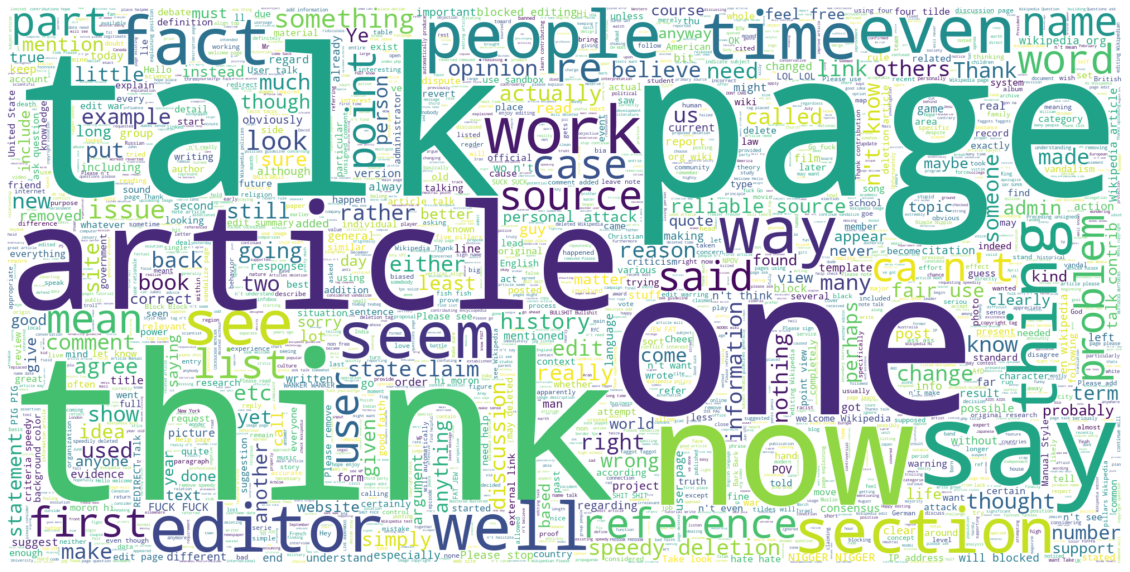

In [40]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = " ".join(' '.join(comment) for comment in df.nltk_tokenized)
wordcloud = WordCloud(width=2000, height=1000,contour_color="black", max_words=10000,relative_scaling = 0, background_color = "white").generate(text)

# Display the generated image:

plt.figure(figsize=[20,15])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Histograms visualizations

Create histograms of words frequency or counts for tokens cleaned from stop words and punctuation as in previous day task.  
Compare the newly created visualizations to the visualisations from the previous day. 

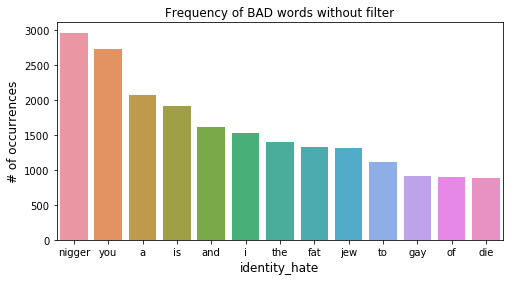

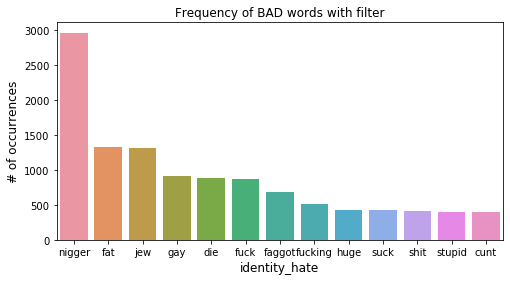

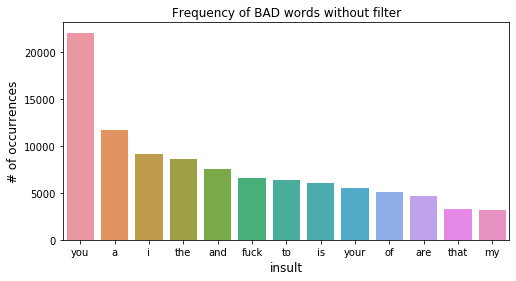

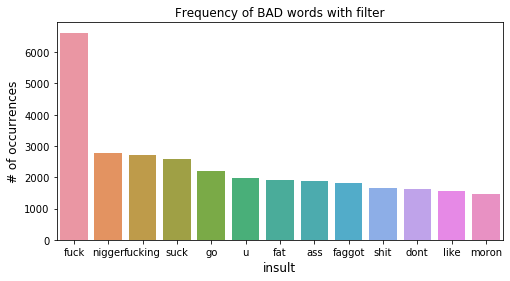

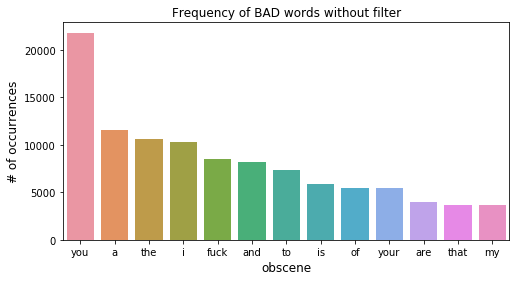

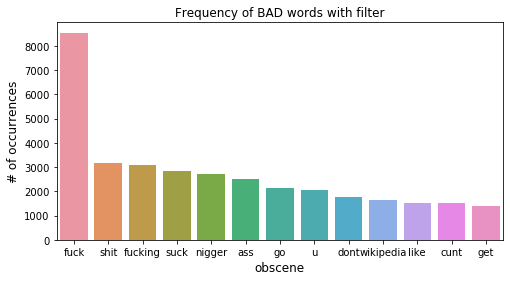

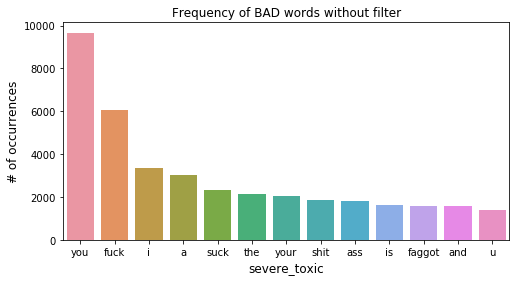

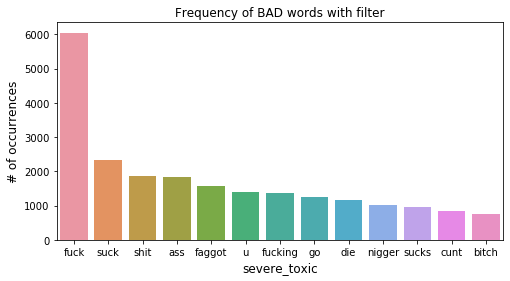

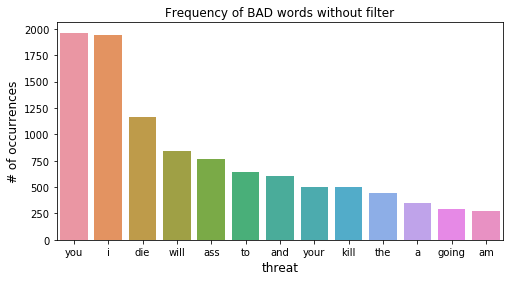

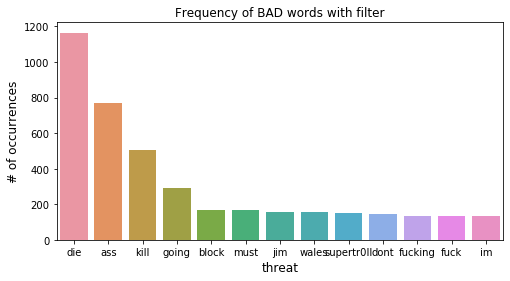

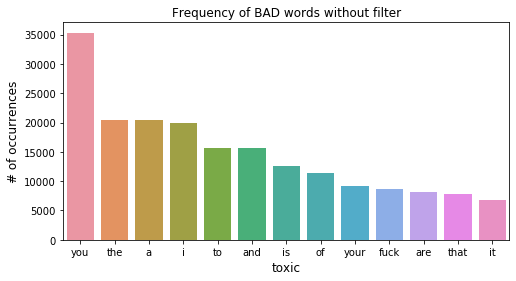

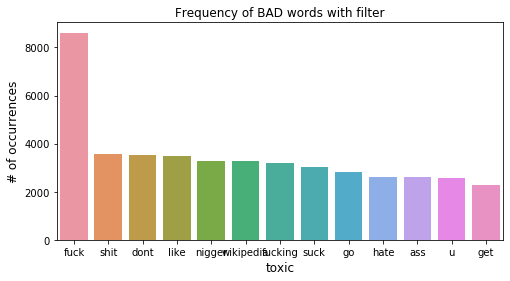

In [44]:
import seaborn as sns
numerical_columns = ['identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic']
for i in numerical_columns:
    text = ''
    for j in range(len(df[i])):
        if df[i][j] != 0:
            text += " " + ' '.join(df.comment_text_tokenized_space_cleaned[j])
            
            
    cnt = Counter(re.split(r'\s+', text)).most_common(13)
    colums = {'words', 'frequency'}
    df_i = pd.DataFrame(cnt,columns = colums)
    
    plt.figure(figsize = (8, 4))
    sns.barplot(x='words', y='frequency', data=df_i)
    plt.title("Frequency of BAD words without filter")
    plt.ylabel('# of occurrences', fontsize = 12)
    plt.xlabel(i, fontsize = 12)
    
    
    
    stop_words = set(stopwords.words('english')) 
    word_tokens = word_tokenize(text) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    
    cnt1 = Counter(filtered_sentence).most_common(13)
    colums = {'words', 'frequency'}
    df_i = pd.DataFrame(cnt1,columns = colums)
    
    plt.figure(figsize = (8, 4))
    sns.barplot(x='words', y='frequency', data=df_i)
    plt.title("Frequency of BAD words with filter")
    plt.ylabel('# of occurrences', fontsize = 12)
    plt.xlabel(i, fontsize = 12)

### Word counts plot 

Complete the plot as we did previously using FreqDict, but make plot larger (see how to set the plots size) and show 50 most common tokens withing the label and 50 most unfrequent. 

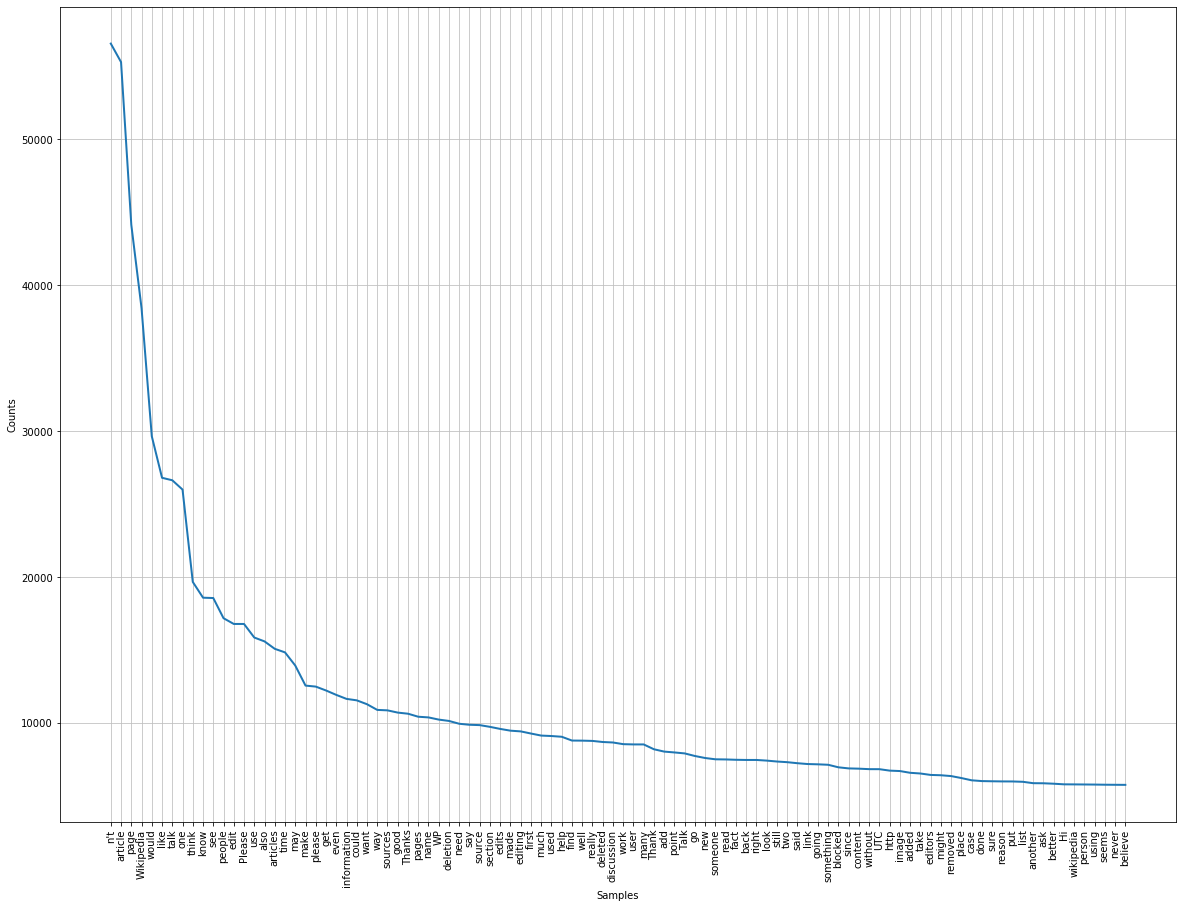

In [42]:
fd = FreqDist(flat_nested(df.cleaned_nltk.tolist()))
plt.figure(figsize=[20,15]) 
fd.plot(100, cumulative=False)

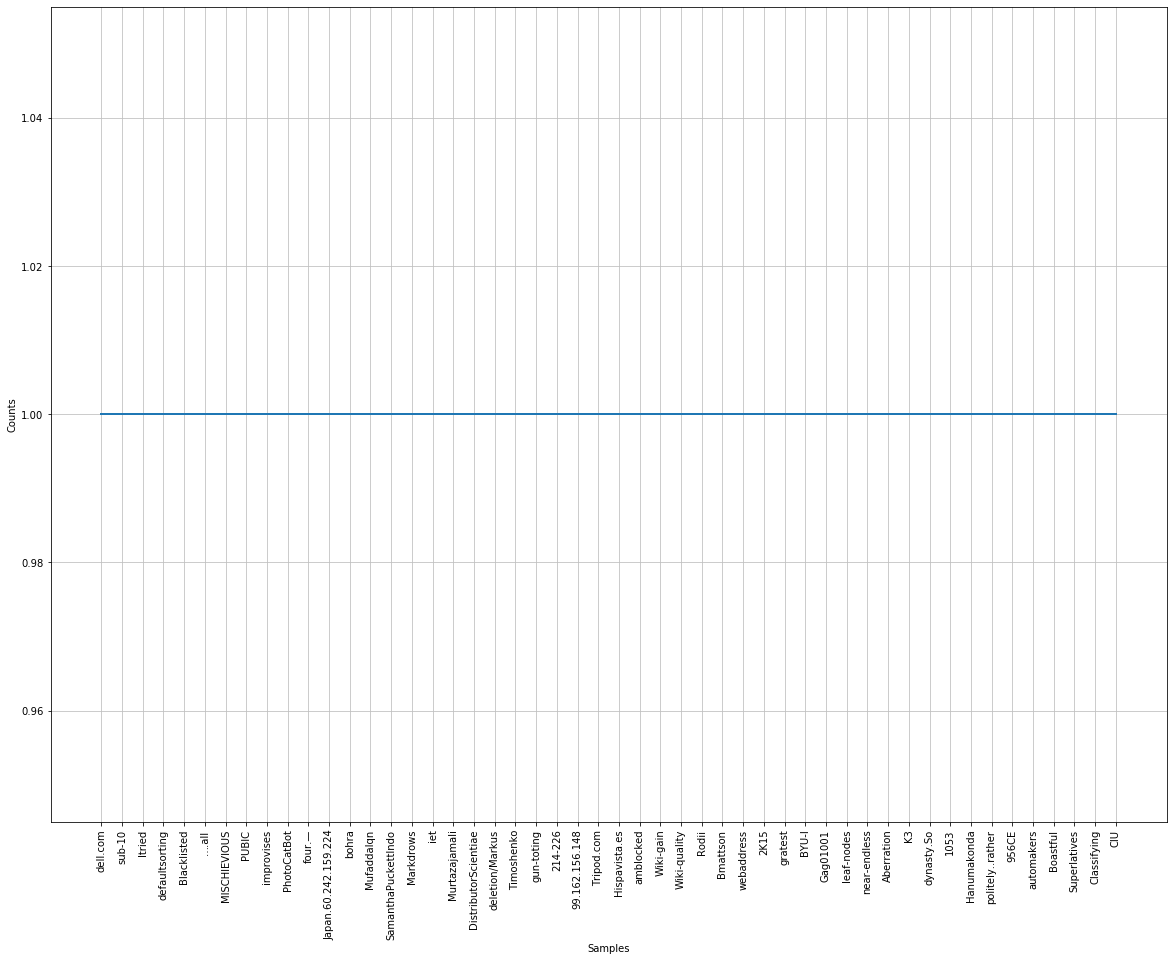

In [43]:
last_fifty = FreqDist(dict(fd.most_common()[-50:]))
plt.figure(figsize=[20,15]) 
last_fifty.plot(100, cumulative=False)